# Linear Regression Assignment

In [1]:
#Supressing Warnings (if any).

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from math import sqrt


In [3]:
#Reading the csv file.
df = pd.read_csv(r'C:\Users\Admin\Downloads\day.csv')

In [4]:
#Inspecting first few rows.
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Data Exploration

In [5]:
#checking the shape.
df.shape

(730, 16)

Now let's look at the basics of the given dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
df.size

11680

In [10]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [11]:
df.values

array([[1, '01-01-2018', 1, ..., 331, 654, 985],
       [2, '02-01-2018', 1, ..., 131, 670, 801],
       [3, '03-01-2018', 1, ..., 120, 1229, 1349],
       ...,
       [728, '29-12-2019', 1, ..., 159, 1182, 1341],
       [729, '30-12-2019', 1, ..., 364, 1432, 1796],
       [730, '31-12-2019', 1, ..., 439, 2290, 2729]], dtype=object)

In [12]:
df.isnull().values.any()

False

In [13]:
df.drop_duplicates(subset=None, inplace=True)

In [14]:
df.shape  #Same as the original dataframe.

(730, 16)

--There are 730 rows and 16 columns in the data set. 

--There are no null values in any of the columns.

--There are also no duplicates in any of the columns.


## Data Cleaning

First let's rename some columns for better readability.

In [15]:
df.rename(columns={'yr':'year', 'mnth':'month', 'hum':'humidity'}, inplace=True)

Now here 'instant' is just an index column so we can drop it.

In [16]:
df.drop(['instant'], axis=1, inplace=True)

Next the column 'dteday' has the date, since we already have seperate columns for 'year' & 'month',hence, we could live without this column. So let's drop it.

In [17]:
df.drop(['dteday'], axis=1, inplace=True)

Next, 'casual' and 'registered' columns both are not useful to us in the future at the time of prediction and they also together constitute our target variable 'cnt' so it will be safe to drop them as well.

In [18]:
df.drop(['casual','registered'], axis=1, inplace=True)

In [19]:
df.nunique()

season          4
year            2
month          12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
humidity      594
windspeed     649
cnt           695
dtype: int64

Also 'season','yr,'mnth','holiday','weekday','workingday' and 'weathersit' are categorical variables. So we'll replace them with the appropriate values.

In [20]:
#Mapping the 'season' column.
df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df.season.unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

In [21]:
#Mapping the 'month' column.
df.month = df.month.map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'})
df.month.unique()

array(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
       'oct', 'nov', 'dec'], dtype=object)

In [22]:
#Mapping the 'weekday' column.
df.weekday = df.weekday.map({0:'sun', 1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
df.weekday.unique()

array(['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'], dtype=object)

In [23]:
#Mapping the 'weathersit' column.
df.weathersit = df.weathersit.map({1:'clear',2:'hazy',3:'light_rain',4:'heavy_rain'})
df.weathersit.unique()

array(['hazy', 'clear', 'light_rain'], dtype=object)

In [24]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,mon,1,hazy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,hazy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 74.1+ KB


In [26]:
#Changing dtypes of numerical columns to their appropriate types.
df[['temp','atemp','humidity','cnt']] = df[['temp','atemp','humidity','cnt']].apply(pd.to_numeric)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 74.1+ KB


## EDA

First we will use pairplots to look at various relationships between numerical variables.

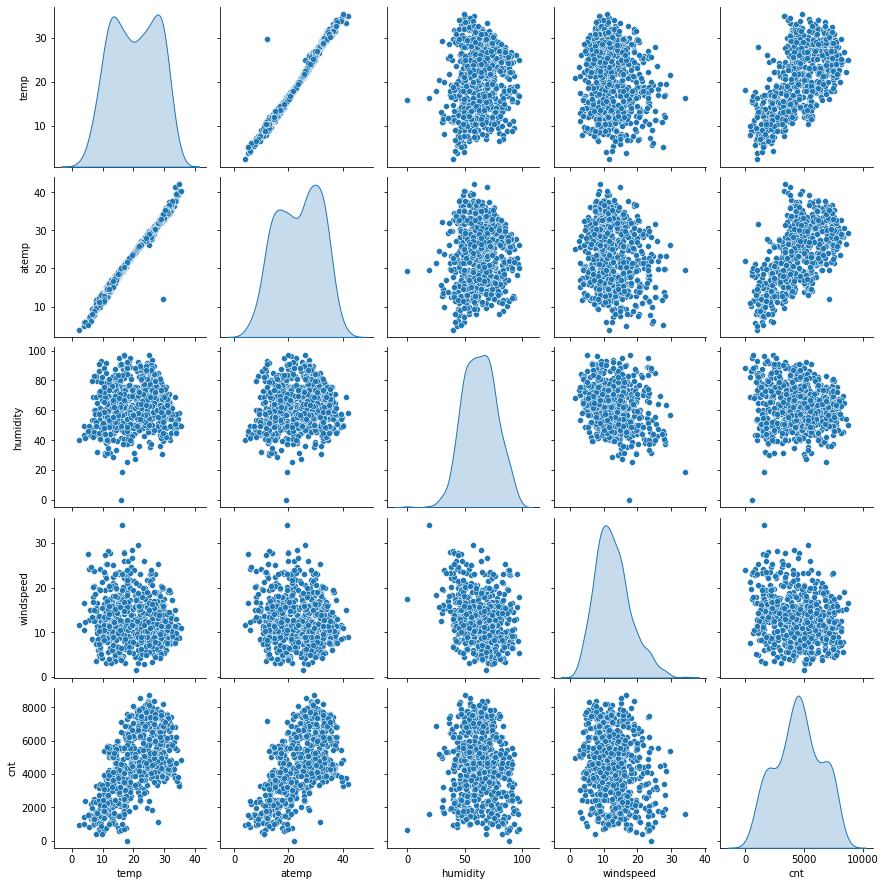

In [28]:
sns.pairplot(df, vars=['temp','atemp','humidity','windspeed','cnt'], diag_kind='kde')
plt.show()

This proves that there is a linear relation between temp, atemp and cnt.

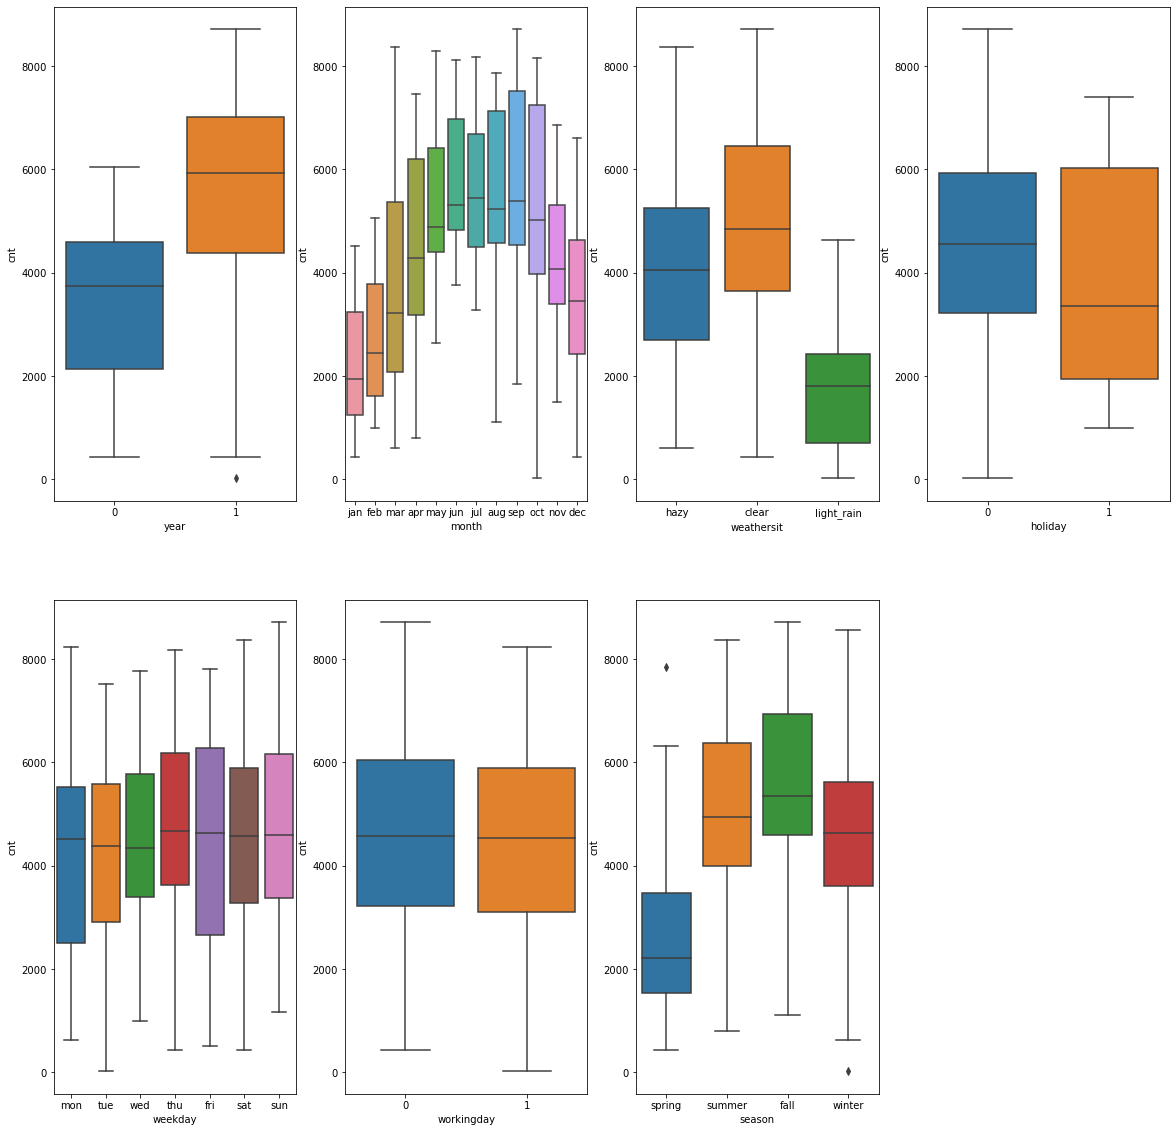

In [29]:
plt.figure(figsize=(20,20))
plt.subplot(2,4,1)
sns.boxplot(x='year',y='cnt', data=df)
plt.subplot(2,4,2)
sns.boxplot(x='month',y='cnt', data=df)
plt.subplot(2,4,3)
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.subplot(2,4,4)
sns.boxplot(x='holiday', y='cnt', data=df)
plt.subplot(2,4,5)
sns.boxplot(x='weekday', y='cnt', data=df)
plt.subplot(2,4,6)
sns.boxplot(x='workingday', y='cnt', data=df)
plt.subplot(2,4,7)
sns.boxplot(x='season', y='cnt', data=df)
plt.show()

Here we have considered 7 categorical variables and plotted it against the dependant variable 'cnt' to study their relationship and the following insights have been derived.

-- The count of bike sharing has increased as compared to the previous year,i.e. from 2018 to 2019.

-- The count of bike sharing is the most for the months of September, October and August. While it is the least for January and February.

-- The count for the weekdays is optimum for Friday while the least is on Monday.

-- The count is almost the same for working and non-working day.

-- The count is the best during the 'fall' while the worst during the 'spring'.



In [30]:
def plot_cols(column):
    plt.figure(figsize = (12,10))
    plt.subplot(1,2,1)
    sns.barplot(column, 'cnt', data=df)
    plt.subplot(1,2,2)
    sns.barplot(column, 'cnt', data=df, hue='year', palette='dark')
    plt.legend(labels=['2018','2019'])
    plt.show()

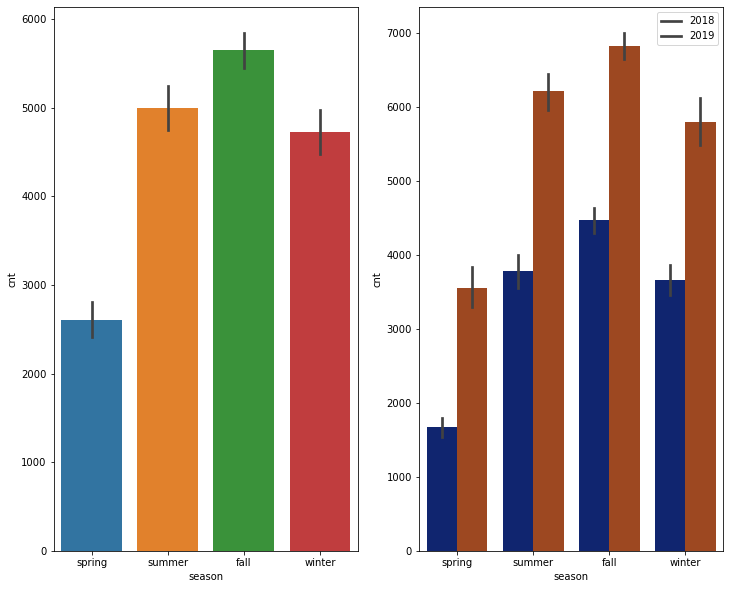

In [31]:
plot_cols('season')

Fall season seems to have attracted more booking. Also in each season the booking count has increased drastically from 2018 to 2019 as seen above.

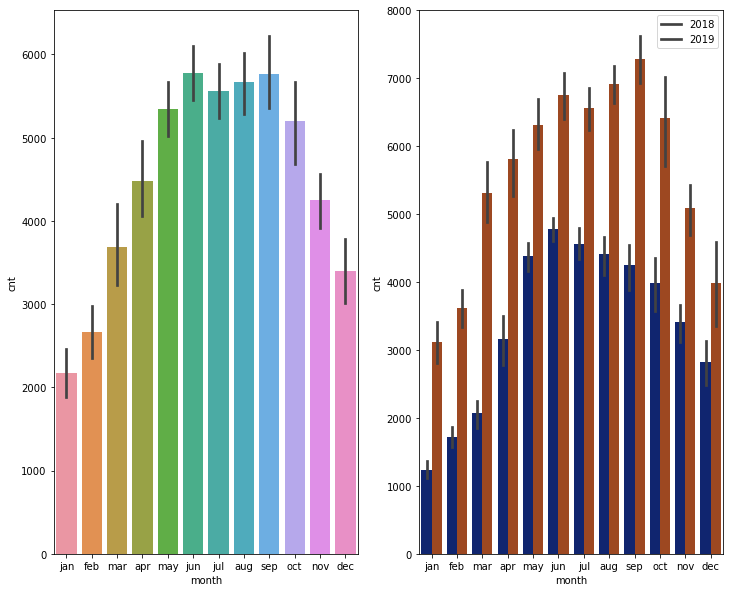

In [32]:
plot_cols('month')

Most of the bookings has been done during the month of may, june, july, aug, sep and oct.Trend increased starting of the year till mid of the year and then it started decreasing as we approached the end of year. Number of booking for each month seems to have increased from 2018 to 2019.

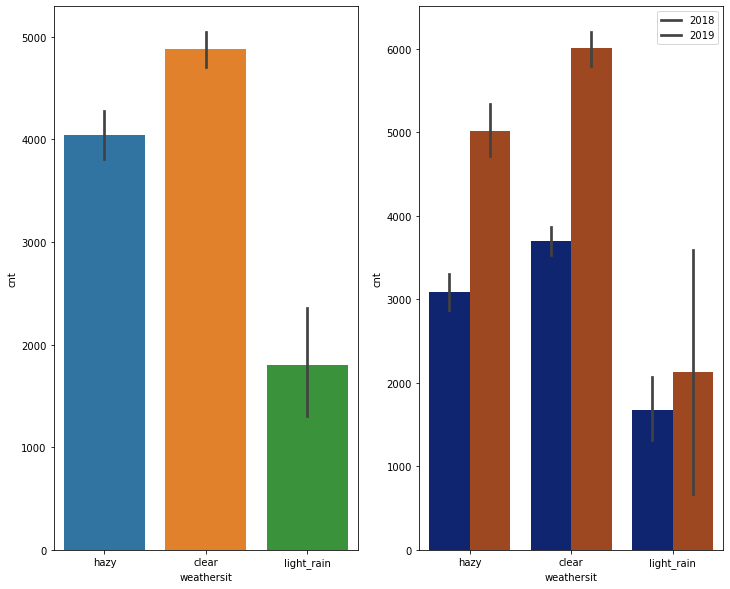

In [33]:
plot_cols('weathersit')


Clear weather attracted more booking which seems obvious. And in comparison to previous year, i.e 2018, booking increased for each weather situation in 2019.

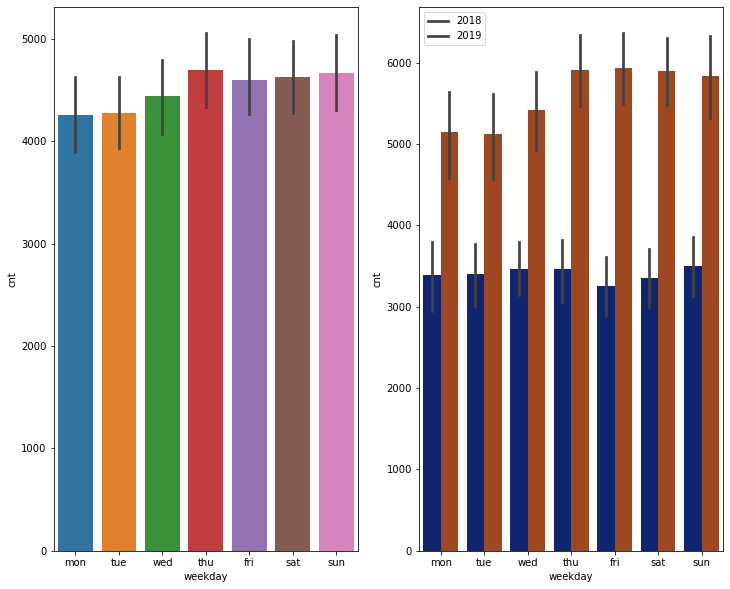

In [34]:
plot_cols('weekday')


Thu, Fri, Sat and Sun have more number of bookings as compared to the start of the week.

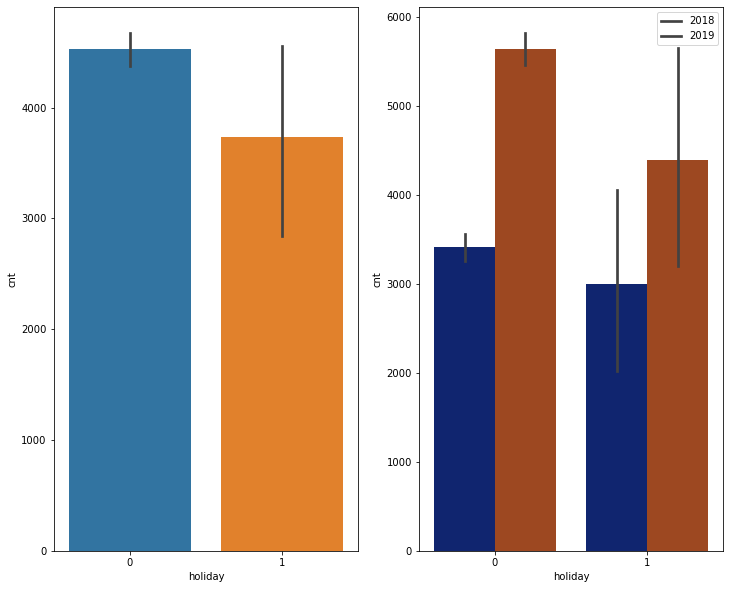

In [35]:
plot_cols('holiday')


When its not holiday, booking seems to be less in number which seems reasonable as on holidays, people may want to spend time at home and enjoy with family.

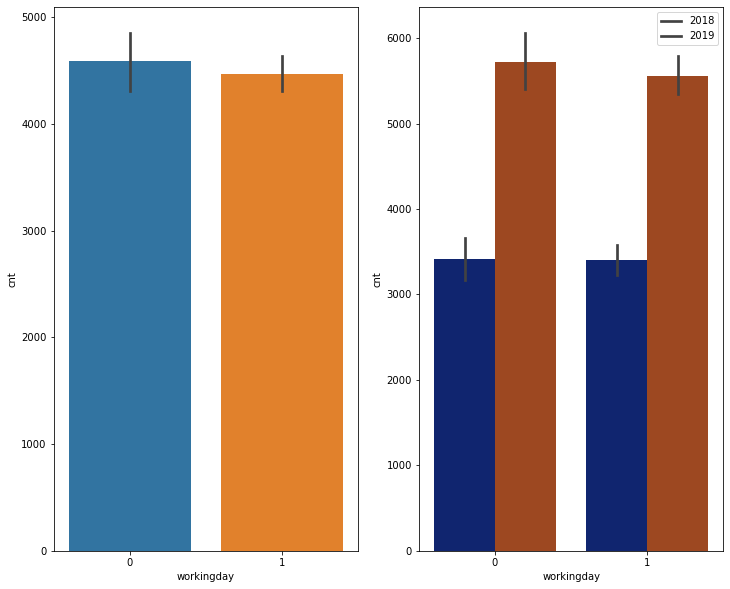

In [36]:
plot_cols('workingday')


Booking seemed to be almost equal either on working day or non-working day. But, the count increased from 2018 to 2019.

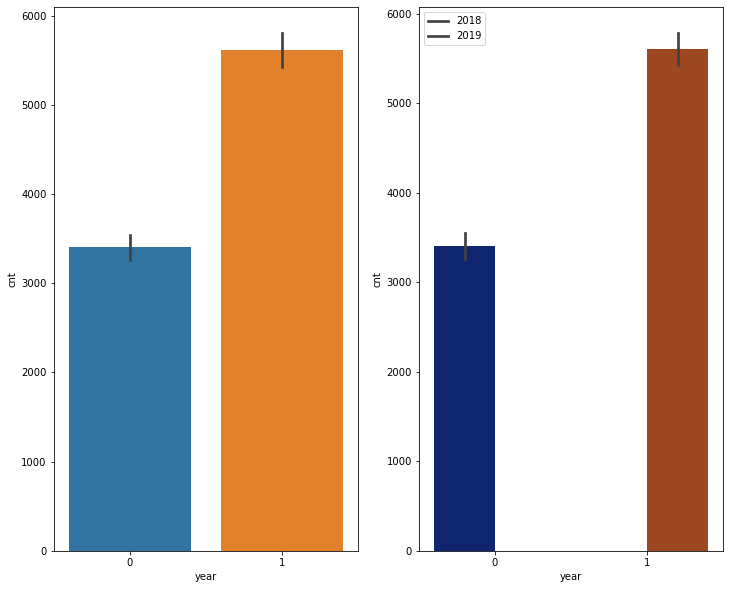

In [37]:
plot_cols('year')

Clearly, 
2019 attracted more number of booking from the previous year, which shows good progress in terms of business.

Again all this is just the confirmation of the insights derived from the pairplots.

Moving forward with the statistical part now, we will look into the correlation between the different variables.

In [38]:
df.corr()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt
year,1.000000,0.008195,-0.011852,0.048789,0.047215,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.257009,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
workingday,-0.011852,-0.257009,1.000000,0.002044,0.010657,0.053770,-0.002453,-0.027640
temp,0.048789,-0.028764,0.002044,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.047215,-0.032703,0.010657,0.991696,1.000000,0.141512,-0.183876,0.630685
humidity,-0.112547,-0.015662,0.053770,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.002453,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,-0.027640,0.627044,0.630685,-0.098543,-0.235132,1.000000


<AxesSubplot:>

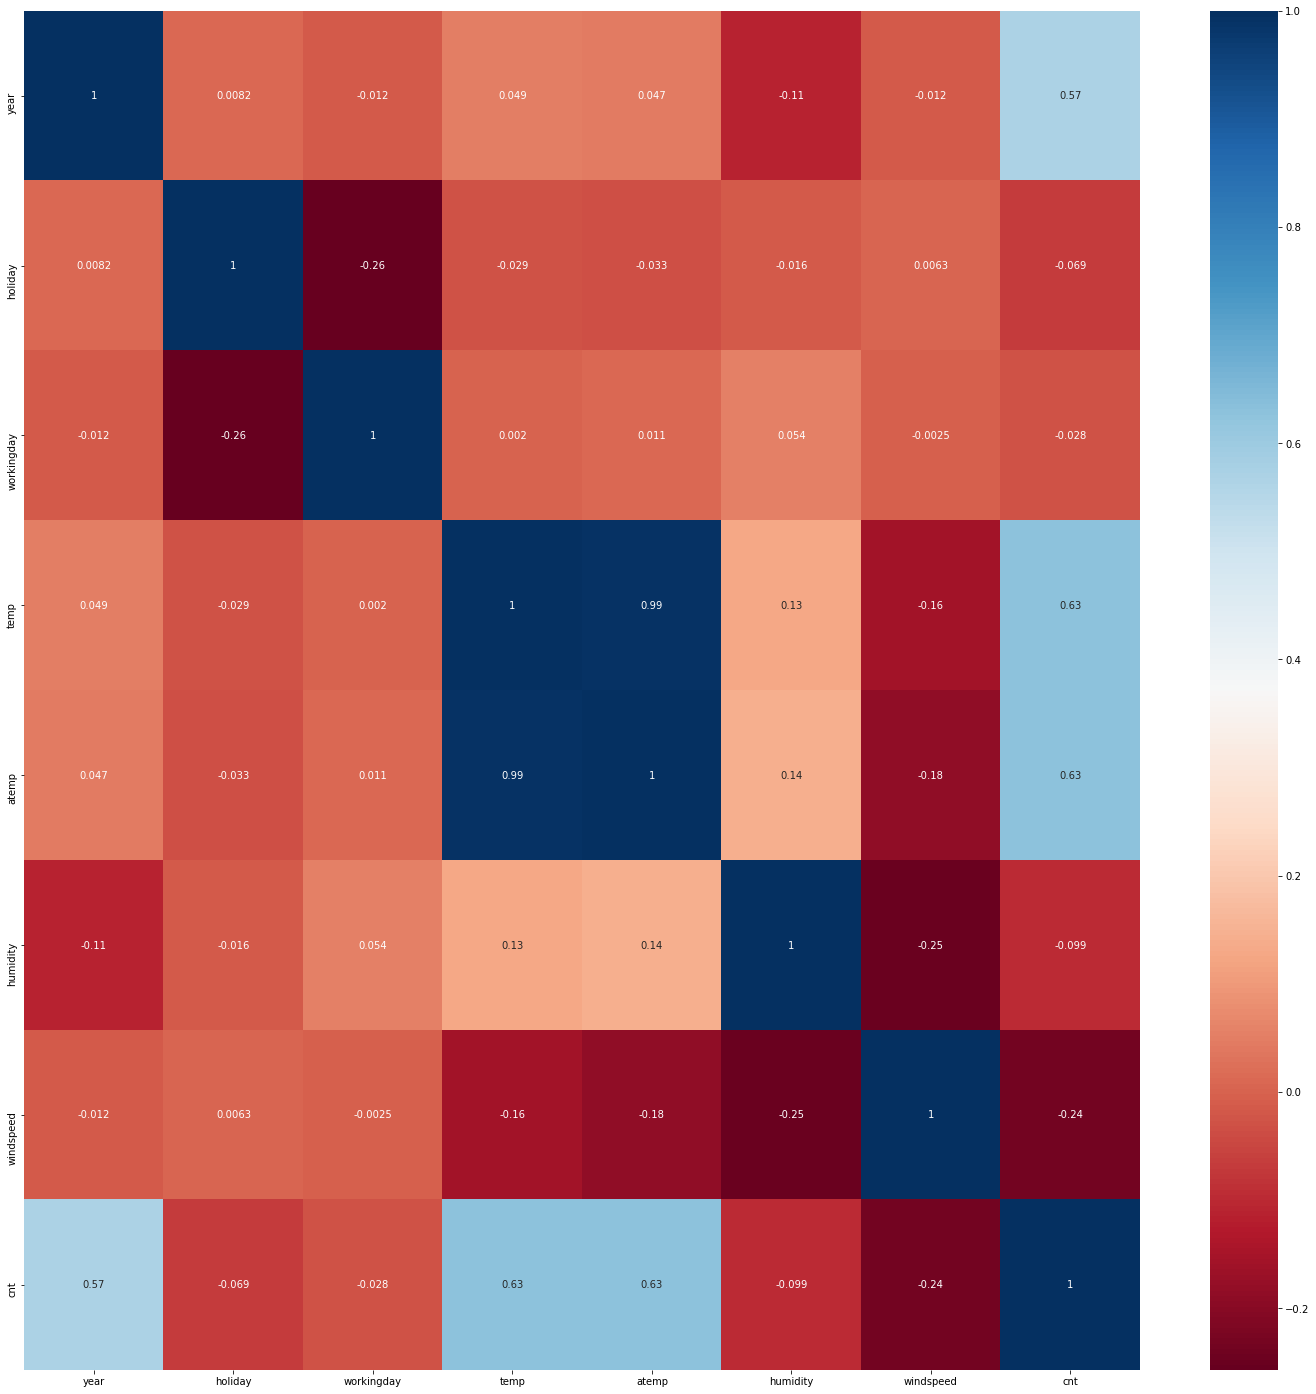

In [39]:
#Heatmap for the variables.
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot=True, cmap='RdBu')

The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.

Correlation between temp and atemp is 0.99 which is almost 1 so we can drop temp and consider atemp.

In [40]:
df.drop(['temp'], axis=1, inplace=True)
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,mon,1,hazy,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,hazy,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,clear,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,11.46350,43.6957,12.522300,1600


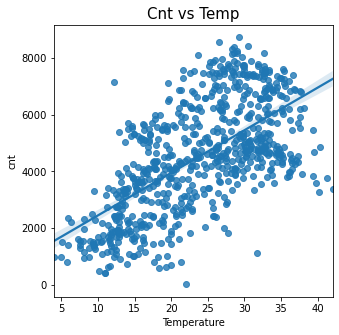

In [41]:
plt.figure(figsize=(5,5))
plt.title('Cnt vs Temp', fontsize=15)
sns.regplot(data=df,x='atemp', y='cnt')
plt.xlabel('Temperature')
plt.show()

Demands for bikes is positvely correlated to temp and we can also see that cnt is increasing with temp indicating a linear relationship.

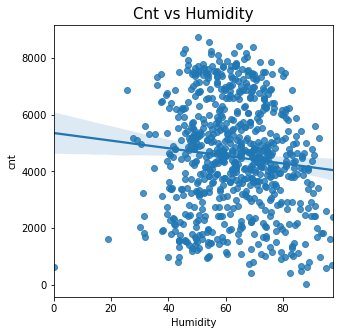

In [42]:
plt.figure(figsize=(5,5))
plt.title('Cnt vs Humidity', fontsize=15)
sns.regplot(data=df, x='humidity',y='cnt')
plt.xlabel('Humidity')
plt.show()

The humidity vs cnt values are scattered as we can see in the graph. Although there is a decreasing with increase in humidity.

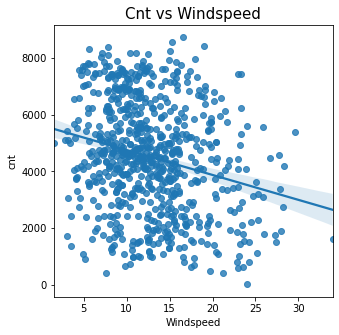

In [43]:
plt.figure(figsize=(5,5))
plt.title('Cnt vs Windspeed', fontsize=15)
sns.regplot(data=df, x='windspeed', y='cnt')
plt.xlabel('Windspeed')
plt.show()

The graph of cnt and windspeed is scattered and we can see a decrease in the cnt with an increase in the windspeed.

## Creating Dummy Variables

In [44]:
### creating dummy variables for season , mnth ,weathersit ,weekday
dummy = df[['season','month','weekday','weathersit']]

In [45]:
dummy = pd.get_dummies(dummy,drop_first=True )

In [46]:
# Adding dummy variables to original dataset
df = pd.concat([dummy,df],axis = 1)
df.head()

,season_spring,season_summer,season_winter,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,...,year,month,holiday,weekday,workingday,weathersit,atemp,humidity,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,jan,0,mon,1,hazy,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,jan,0,tue,1,hazy,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,jan,0,wed,1,clear,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,jan,0,thu,1,clear,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,jan,0,fri,1,clear,11.46350,43.6957,12.522300,1600


In [47]:
# Dropping columns for which dummy variables were created
df.drop(['season', 'month', 'weekday','weathersit'], axis = 1, inplace = True)

In [48]:
df.head()

,season_spring,season_summer,season_winter,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,...,weekday_wed,weathersit_hazy,weathersit_light_rain,year,holiday,workingday,atemp,humidity,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,11.46350,43.6957,12.522300,1600


In [49]:
df.shape

(730, 29)

Now let's split the data into training and testing datasets.

In [50]:
train, test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

## Rescaling the features

In [51]:
scaler = MinMaxScaler()

In [52]:
# Applying scaler() to all the columns except the 'dummy' variables.
num_vars = ['cnt','humidity','windspeed','atemp']

train[num_vars] = scaler.fit_transform(train[num_vars])

In [53]:
train.head()

,season_spring,season_summer,season_winter,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,...,weekday_wed,weathersit_hazy,weathersit_light_rain,year,holiday,workingday,atemp,humidity,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0.501133,0.575354,0.300794,0.864243
576,0,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,1,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0.391735,0.504508,0.188475,0.482973


In [54]:
train.describe()

,season_spring,season_summer,season_winter,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,...,weekday_wed,weathersit_hazy,weathersit_light_rain,year,holiday,workingday,atemp,humidity,windspeed,cnt
count,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,...,0.135294,0.343137,0.029412,0.507843,0.025490,0.711765,0.512989,0.650369,0.320768,0.513620
std,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,...,0.342373,0.475223,0.169124,0.500429,0.157763,0.453386,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


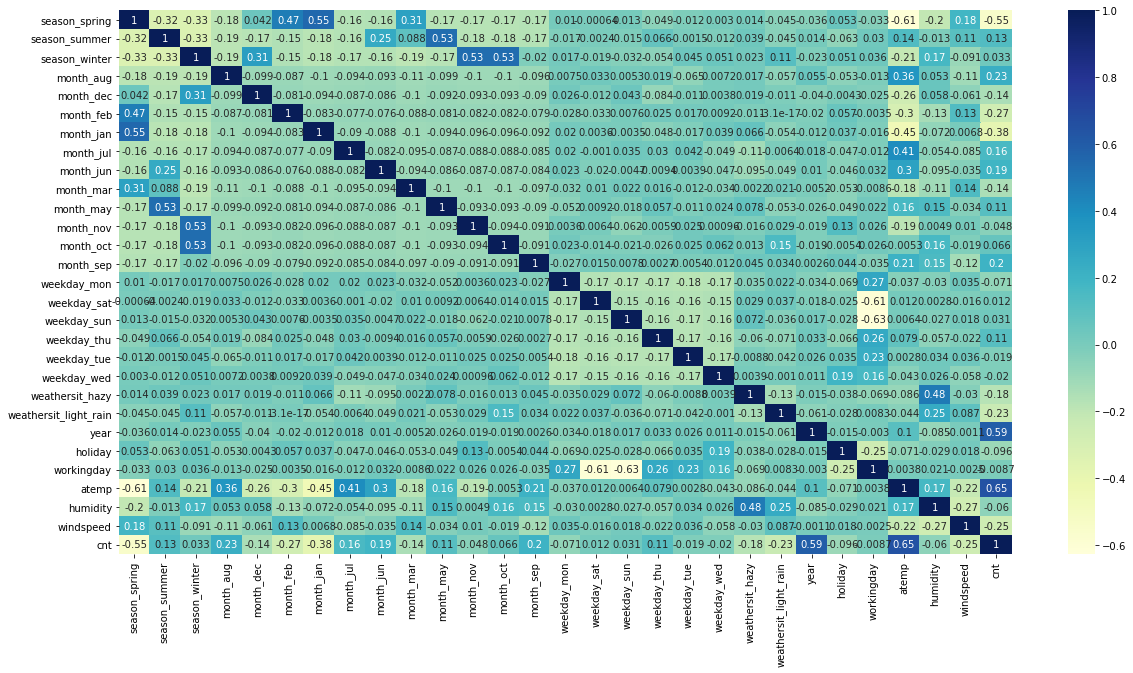

In [55]:
plt.figure(figsize = (20, 10))
sns.heatmap(train.corr(), annot = True, cmap="YlGnBu")
plt.show()

Okay so first we build a model using all the columns.

In [56]:
#Dividing into X and y sets for model building.
y_train = train.pop('cnt')
X_train = train

## Building a linear regression model

In [57]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 13)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [58]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season_spring', False, 7),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('month_aug', True, 1),
 ('month_dec', False, 2),
 ('month_feb', True, 1),
 ('month_jan', True, 1),
 ('month_jul', False, 12),
 ('month_jun', False, 9),
 ('month_mar', False, 16),
 ('month_may', False, 8),
 ('month_nov', False, 3),
 ('month_oct', False, 14),
 ('month_sep', True, 1),
 ('weekday_mon', False, 11),
 ('weekday_sat', False, 5),
 ('weekday_sun', False, 6),
 ('weekday_thu', False, 15),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 13),
 ('weathersit_hazy', True, 1),
 ('weathersit_light_rain', True, 1),
 ('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

### Model 1

In [59]:
col = X_train.columns[rfe.support_]
col

Index(['season_summer', 'season_winter', 'month_aug', 'month_feb', 'month_jan',
       'month_sep', 'weathersit_hazy', 'weathersit_light_rain', 'year',
       'holiday', 'atemp', 'humidity', 'windspeed'],
      dtype='object')

In [60]:
X_train.columns[~rfe.support_]

Index(['season_spring', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'weekday_mon', 'weekday_sat',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed',
       'workingday'],
      dtype='object')

In [61]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [62]:
# Adding a constant variable 
 
X_train_rfe = sm.add_constant(X_train_rfe)

In [63]:
# Creating a first fitted model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [64]:
lm.params

const                    0.264788
season_summer            0.087282
season_winter            0.122926
month_aug                0.063461
month_feb               -0.030054
month_jan               -0.053145
month_sep                0.120929
weathersit_hazy         -0.054993
weathersit_light_rain   -0.232455
year                     0.230825
holiday                 -0.089882
atemp                    0.516372
humidity                -0.171129
windspeed               -0.171834
dtype: float64

In [65]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     198.5
Date:                Wed, 22 Sep 2021   Prob (F-statistic):          5.80e-187
Time:                        23:03:46   Log-Likelihood:                 503.88
No. Observations:                 510   AIC:                            -979.8
Df Residuals:                     496   BIC:                            -920.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2648      0.030      8.735      0.000       0.205       0.324
season_summer             0.0873      0.012      7.116      0.000       0.063       0.111
season_winter             0.1229      0.013      9.390      0.000       0.097       0.149
month_aug                 0.0635      0.016      3.854      0.000       0.031       0.096
month_feb                -0.0301      0.020     -1.495      0.136      -0.070       0.009
month_jan                -0.0531      0.020     -2.685      0.007      -0.092      -0.014
month_sep                 0.1209      0.017      7.324      0.000       0.088       0.153
weathersit_hazy          -0.0550      0.011     -5.171      0.000      -0.076      -0.034
weathersit_light_rain    -0.2325      0.027     -8.714      0.000      -0.285      -0.180
year                      0.2308      0.008     28.093      0.000       0.215       0.247
holiday                  -0.0899      0.026     -3.469      0.001      -0.141      -0.039
atemp                     0.5164      0.029     17.779      0.000       0.459       0.573
humidity                 -0.1711      0.038     -4.495      0.000      -0.246      -0.096
windspeed                -0.1718      0.026     -6.567      0.000      -0.223      -0.120
==============================================================================
Omnibus:                       56.552   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.652
Skew:                          -0.575   Prob(JB):                     4.73e-31
Kurtosis:                       5.292   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Okay so we are dropping month_feb since it has p > 0.05.

In [66]:
#Dropping month_feb.
X_train_new = X_train_rfe.drop(["month_feb"], axis = 1)

Now rebuilding the model without month_feb.

### Model 2

In [67]:
# Adding a constant variable.
X_train_lm = sm.add_constant(X_train_new)

In [68]:
# Running the linear model.
lm = sm.OLS(y_train,X_train_lm).fit()   

In [69]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     214.3
Date:                Wed, 22 Sep 2021   Prob (F-statistic):          1.18e-187
Time:                        23:03:46   Log-Likelihood:                 502.73
No. Observations:                 510   AIC:                            -979.5
Df Residuals:                     497   BIC:                            -924.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2496      0.029      8.727      0.000       0.193       0.306
season_summer             0.0939      0.011      8.192      0.000       0.071       0.116
season_winter             0.1317      0.012     11.261      0.000       0.109       0.155
month_aug                 0.0668      0.016      4.086      0.000       0.035       0.099
month_jan                -0.0400      0.018     -2.253      0.025      -0.075      -0.005
month_sep                 0.1240      0.016      7.558      0.000       0.092       0.156
weathersit_hazy          -0.0548      0.011     -5.148      0.000      -0.076      -0.034
weathersit_light_rain    -0.2315      0.027     -8.669      0.000      -0.284      -0.179
year                      0.2303      0.008     28.021      0.000       0.214       0.246
holiday                  -0.0917      0.026     -3.541      0.000      -0.143      -0.041
atemp                     0.5347      0.026     20.288      0.000       0.483       0.587
humidity                 -0.1735      0.038     -4.554      0.000      -0.248      -0.099
windspeed                -0.1721      0.026     -6.568      0.000      -0.224      -0.121
==============================================================================
Omnibus:                       53.272   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.306
Skew:                          -0.537   Prob(JB):                     1.13e-29
Kurtosis:                       5.263   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
# Calculating the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,49.87
10,atemp,1.91
11,humidity,1.88
2,season_winter,1.56
6,weathersit_hazy,1.56
4,month_jan,1.55
1,season_summer,1.48
3,month_aug,1.41
7,weathersit_light_rain,1.24
5,month_sep,1.21


We want a VIF less than 5 so we can drop 'const'.

In [71]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [72]:
# Calculating the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,humidity,18.54
9,atemp,11.46
11,windspeed,3.60
5,weathersit_hazy,2.15
7,year,2.04
1,season_winter,2.03
0,season_summer,1.96
2,month_aug,1.56
3,month_jan,1.54
4,month_sep,1.31


### Model 3 (final)

In [73]:
# dropping hum from the model
X_train_new = X_train_new.drop(['humidity'], axis=1)

In [74]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Create a first fitted model
lm = sm.OLS(y_train,X_train_lm).fit()

In [75]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     223.1
Date:                Wed, 22 Sep 2021   Prob (F-statistic):          1.91e-184
Time:                        23:03:47   Log-Likelihood:                 492.31
No. Observations:                 510   AIC:                            -960.6
Df Residuals:                     498   BIC:                            -909.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1550      0.020      7.734      0.000       0.116       0.194
season_summer             0.0901      0.012      7.732      0.000       0.067       0.113
season_winter             0.1206      0.012     10.339      0.000       0.098       0.144
month_aug                 0.0649      0.017      3.898      0.000       0.032       0.098
month_jan                -0.0463      0.018     -2.565      0.011      -0.082      -0.011
month_sep                 0.1176      0.017      7.059      0.000       0.085       0.150
weathersit_hazy          -0.0824      0.009     -9.242      0.000      -0.100      -0.065
weathersit_light_rain    -0.2791      0.025    -11.138      0.000      -0.328      -0.230
year                      0.2343      0.008     28.119      0.000       0.218       0.251
holiday                  -0.0931      0.026     -3.525      0.000      -0.145      -0.041
atemp                     0.5069      0.026     19.390      0.000       0.456       0.558
windspeed                -0.1410      0.026     -5.468      0.000      -0.192      -0.090
==============================================================================
Omnibus:                       52.093   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.089
Skew:                          -0.544   Prob(JB):                     1.87e-27
Kurtosis:                       5.147   Cond. No.                         12.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
# Calculating the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,atemp,4.95
10,windspeed,3.27
7,year,2.04
0,season_summer,1.90
1,season_winter,1.57
2,month_aug,1.56
5,weathersit_hazy,1.54
4,month_sep,1.31
3,month_jan,1.22
6,weathersit_light_rain,1.08


## Residual Analysis of the train data

Okay so now  to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [77]:
y_train_cnt = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

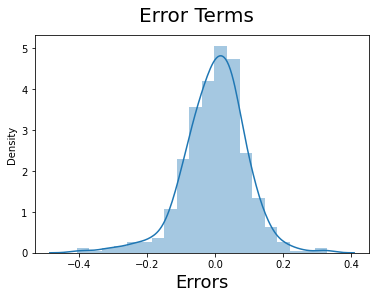

In [78]:
# Plotting the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)     

## Predictions Using the Final ML Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. third model.

In [79]:
num_vars = ['cnt','humidity','windspeed','atemp']
test[num_vars] = scaler.transform(test[num_vars])

In [80]:
test.describe()

,season_spring,season_summer,season_winter,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,...,weekday_wed,weathersit_hazy,weathersit_light_rain,year,holiday,workingday,atemp,humidity,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,...,0.155251,0.319635,0.027397,0.479452,0.036530,0.639269,0.532991,0.638508,0.313350,0.520592
std,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,...,0.362974,0.467403,0.163612,0.500722,0.188034,0.481313,0.217888,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.344751,0.527265,0.198517,0.377531
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.549198,0.627737,0.299459,0.524275
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.714132,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.980934,1.002146,0.807474,0.963300


In [81]:
y_test = test.pop('cnt')
X_test = test

In [82]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

In [83]:

# predicting using values used by the final model
test_col = X_train_lm.columns
X_test=X_test[test_col[1:]]
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   const                  219 non-null    float64
 1   season_summer          219 non-null    uint8  
 2   season_winter          219 non-null    uint8  
 3   month_aug              219 non-null    uint8  
 4   month_jan              219 non-null    uint8  
 5   month_sep              219 non-null    uint8  
 6   weathersit_hazy        219 non-null    uint8  
 7   weathersit_light_rain  219 non-null    uint8  
 8   year                   219 non-null    int64  
 9   holiday                219 non-null    int64  
 10  atemp                  219 non-null    float64
 11  windspeed              219 non-null    float64
dtypes: float64(3), int64(2), uint8(7)
memory usage: 11.8 KB


In [84]:
#Making predictions using the final model.
y_pred = lm.predict(X_test)

In [85]:
r2_score(y_test, y_pred)

0.791027646986757

In [86]:
mse = mean_squared_error(y_test, y_pred)
mse

0.009925310787430277

## Model Intrepretation

Let's now plot a graph for actual versus predicted values to see if our model holds or not.

Text(0, 0.5, 'y_pred')

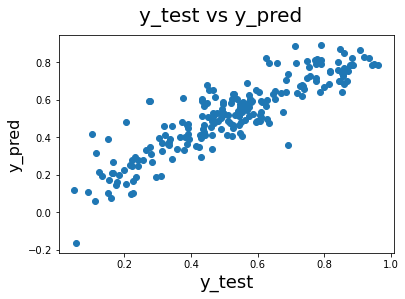

In [87]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [88]:
param = pd.DataFrame(lm.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,12))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
10,atemp,0.506865
8,year,0.234335
0,const,0.154976
2,season_winter,0.120615
5,month_sep,0.117648
1,season_summer,0.090112
3,month_aug,0.064922
4,month_jan,-0.046296
6,weathersit_hazy,-0.082446


## Final Report

As per our final model, the top 3 predictor variables that influences the bike sharing are:

*Temperature.

*Year.

*Weather Situation.
    

So, it's suggested to consider these variables utmost importance while planning, to achive optimum profit:

-- Company should focus on expanding business during Spring.

-- Company should focus on expanding business during September.

-- Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.

-- There would be less bookings during Light Snow or Rain, they could probably use this time to serive the bikes without having business impact.


Hence when the situation comes back to normal, the company should come up with new offers during spring when the weather is pleasant and also advertise a little for September as this is when business would be at its best.

Other significant variables to predict the demand for shared bikes:

holiday

humidity

windspeed

Season

months(January, July, September, November, December)

Year (2019)

Sunday
